In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_weekly_final.xlsx") # Read Excel
df1=xls_file.parse("FCPO") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,FCPOc1,FCPOc3,FCPOc6,FCPOc9,FCPOc12,MYR=,MYR3MV=,MYR6MV=,MYR9MV=,MYR1YV=,MYR1YNDFOR=,FCPOc1 USD,FCPOc3 USD,FCPOc6 USD,FCPOc9 USD,FCPOc12 USD
Timestamp,,,,,,,,,,,,,,,,
1980-10-24,839.0,878.0,915.0,988.0,NaN,2.141,NaN,NaN,NaN,NaN,NaN,391.872957,NaN,NaN,NaN,NaN
1980-10-31,870.0,885.0,920.0,960.0,NaN,2.147,NaN,NaN,NaN,NaN,NaN,405.216581,NaN,NaN,NaN,NaN
1980-11-07,921.0,942.0,945.0,NaN,NaN,2.158,NaN,NaN,NaN,NaN,NaN,426.784059,NaN,NaN,NaN,NaN
1980-11-14,946.0,954.0,NaN,NaN,NaN,2.158,NaN,NaN,NaN,NaN,NaN,438.368860,NaN,NaN,NaN,NaN
1980-11-21,1002.0,1017.0,NaN,NaN,NaN,2.173,NaN,NaN,NaN,NaN,NaN,461.113668,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Timestamp'>

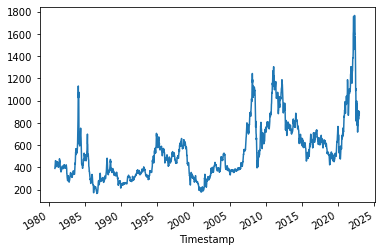

In [28]:
spot = df1["FCPOc1 USD"]
spot = spot[spot != 0]
#spot = np.log(spot).diff()
spot.plot()

In [29]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count    2200.000000
mean      539.116789
std       256.253746
min       166.347992
25%       353.474642
50%       476.420606
75%       658.988074
max      1765.395221
Name: FCPOc1 USD, dtype: float64

In [30]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 1.2819333819550094
Skewness logs: 0.21480628153609868
Kurtosis spot: 4.815408091694401
Kurtosis logs: 2.546217935850284
JB spot: Jarque_beraResult(statistic=904.6692712265946, pvalue=0.0)
JB logs: Jarque_beraResult(statistic=35.794468975231986, pvalue=1.687834350061479e-08)
Q(6) spot:        lb_stat  lb_pvalue
6  12556.91593        0.0
Q(6) logs:         lb_stat  lb_pvalue
6  12667.004409        0.0


In [31]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-2.943791407168873, 0.04048751305225831, 14, 2185, {'1%': -3.4333463382232248, '5%': -2.86286368244583, '10%': -2.5674746615942903}, 20382.293216298865)
ADF logs: (-2.5914105637818694, 0.09478555612785433, 17, 2182, {'1%': -3.4333504627066542, '5%': -2.8628655035890977, '10%': -2.567475631233297}, -7842.103812979263)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.847
P-value                         0.052
Lags                               26
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.501
P-value                         0.115
Lags                               26
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The pr

In [32]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  3.479
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  3.682
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


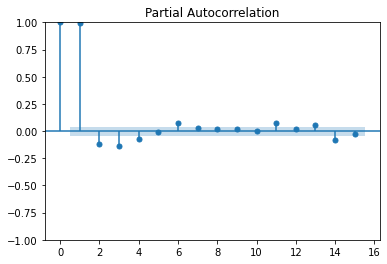

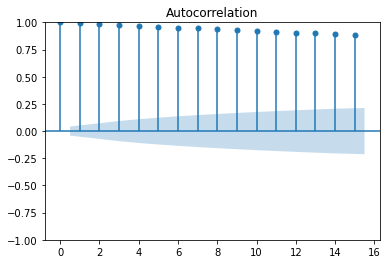

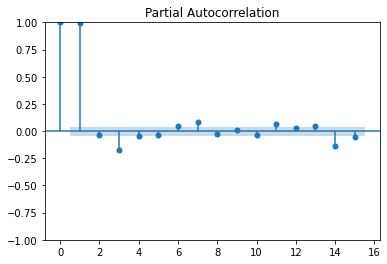

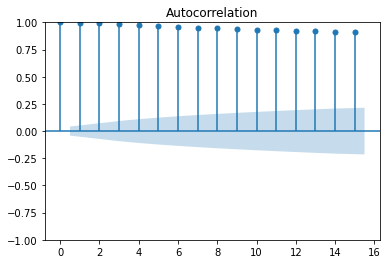

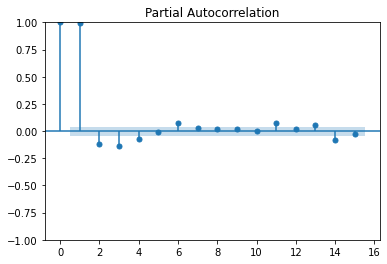

In [33]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

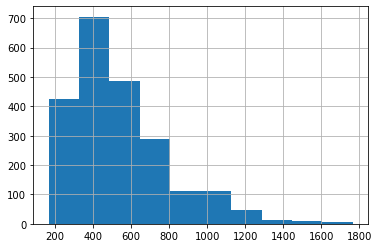

In [34]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

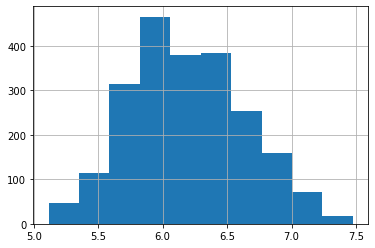

In [35]:
np.log(spot).hist()

In [51]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=1500)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13397.368, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13458.583, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13411.246, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13420.826, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13456.653, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13388.090, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13403.912, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13390.609, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13383.637, Time=0.26 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13389.054, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13379.641, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13380.750, Time=0.28 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=13379.270, Time=0.29 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=13382.876, Time=0.25 sec
 ARIMA(3,1,4)(0,0,0

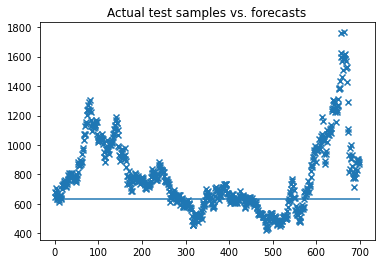

In [52]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [53]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:               SARIMAX(1, 1, 5)   Log Likelihood               -6677.904
Date:                Tue, 27 Dec 2022   AIC                          13369.807
Time:                        20:06:58   BIC                          13406.995
Sample:                             0   HQIC                         13383.661
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7939      0.077     10.324      0.000       0.643       0.945
ma.L1         -0.6514      0.077     -8.471      0.000      -0.802      -0.501
ma.L2          0.0209      0.017      1.205      0.228      -0.013       0.055
ma.L3          0.0073      0.018      0.402      0.688      -0.028       0.043
ma.L4         -0.0086      0.017     -0.521      0.602      -0.041       0.024
ma.L5         -0.1195      0.015     -8.112      0.000      -0.148      -0.091
sigma2       434.6824      5.458     79.635      0.000     423.984     445.381
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             74617.51
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -1.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

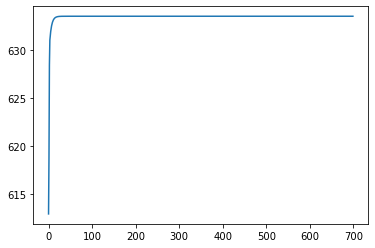

In [54]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [55]:
arima.predict(n_periods=test.shape[0])

array([612.96929919, 618.80968925, 628.4084752 , 630.99325145,
       631.5052616 , 631.91176577, 632.23450475, 632.4907394 ,
       632.69417375, 632.85568795, 632.98392016, 633.08572855,
       633.16655807, 633.23073167, 633.28168151, 633.32213251,
       633.35424809, 633.37974585, 633.39998949, 633.41606168,
       633.42882199, 633.43895289, 633.44699619, 633.45338207,
       633.45845206, 633.46247731, 633.46567312, 633.46821039,
       633.47022482, 633.47182415, 633.47309393, 633.47410204,
       633.47490243, 633.47553788, 633.4760424 , 633.47644295,
       633.47676096, 633.47701344, 633.4772139 , 633.47737305,
       633.4774994 , 633.47759972, 633.47767936, 633.4777426 ,
       633.4777928 , 633.47783266, 633.4778643 , 633.47788943,
       633.47790938, 633.47792521, 633.47793779, 633.47794777,
       633.47795569, 633.47796199, 633.47796698, 633.47797095,
       633.4779741 , 633.4779766 , 633.47797858, 633.47798016,
       633.47798141, 633.4779824 , 633.47798319, 633.47

<AxesSubplot:xlabel='Timestamp'>

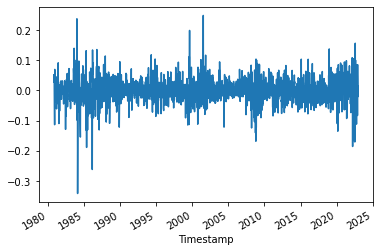

In [56]:
spot2 = np.log(spot).diff()
spot2.plot()

In [57]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    2199.000000
mean        0.000371
std         0.040736
min        -0.341153
25%        -0.019435
50%         0.000832
75%         0.022142
max         0.248107
Name: FCPOc1 USD, dtype: float64

In [58]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.42755403896161753
Kurtosis spot: 8.496552970723187
JB spot: Jarque_beraResult(statistic=2835.180264266046, pvalue=0.0)
Q(6) spot:       lb_stat     lb_pvalue
6  109.112798  3.126338e-21


In [59]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-10.53894965619306, 8.751334776935141e-19, 16, 2182, {'1%': -3.4333504627066542, '5%': -2.8628655035890977, '10%': -2.567475631233297}, -7832.665106976123)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -41.877
P-value                         0.000
Lags                               26
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [60]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.030
P-value                         0.977
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


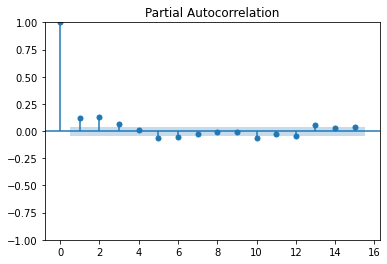

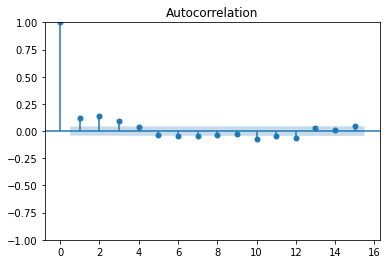

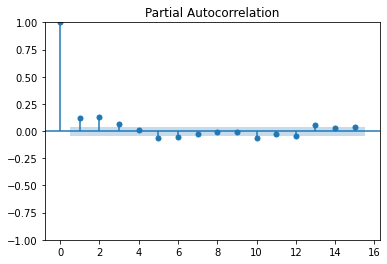

In [61]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

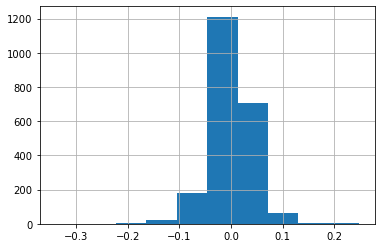

In [62]:
spot2.hist()


In [63]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=1500)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-5375.136, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5312.585, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5369.093, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5358.382, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-5387.647, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-5372.508, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-5381.227, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-5391.744, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-5389.676, Time=0.13 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-5393.465, Time=0.14 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-5391.835, Time=0.19 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-5390.982, Time=0.18 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-5385.053, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-5384.614, Time=0.19 sec
 ARIMA(3,0,4)(0,0,0

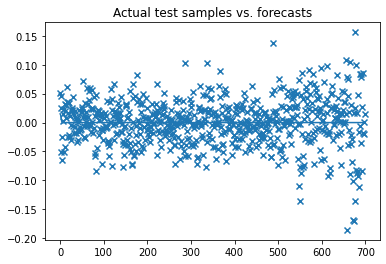

In [64]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [65]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:               SARIMAX(2, 0, 3)   Log Likelihood                2702.733
Date:                Tue, 27 Dec 2022   AIC                          -5393.465
Time:                        20:07:29   BIC                          -5361.586
Sample:                             0   HQIC                         -5381.589
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8223      0.376      2.189      0.029       0.086       1.558
ar.L2         -0.2758      0.240     -1.147      0.251      -0.747       0.196
ma.L1         -0.6594      0.377     -1.750      0.080      -1.398       0.079
ma.L2          0.2680      0.185      1.451      0.147      -0.094       0.630
ma.L3          0.0632      0.029      2.150      0.032       0.006       0.121
sigma2         0.0016      3e-05     52.941      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2979.98
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

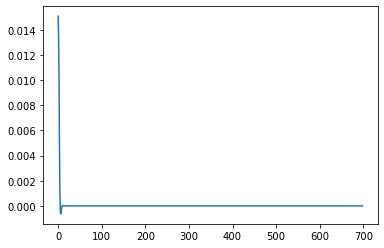

In [66]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [67]:
arima2.predict(n_periods=test2.shape[0])

array([ 1.50879234e-002,  1.32622298e-002,  1.00845996e-002,
        4.63531761e-003,  1.03059485e-003, -4.30841860e-004,
       -6.38504473e-004, -4.06237090e-004, -1.57970627e-004,
       -1.78708520e-005,  2.88693003e-005,  2.86681370e-005,
        1.56128104e-005,  4.93265512e-006, -2.49458144e-007,
       -1.56545179e-006, -1.21850431e-006, -5.70280997e-007,
       -1.32915702e-007,  4.79719703e-008,  7.61034491e-008,
        4.93516310e-008,  1.95950827e-008,  2.50329687e-009,
       -3.34538660e-009, -3.44132628e-009, -1.90728091e-009,
       -6.19349535e-010,  1.66837924e-011,  1.84522370e-010,
        1.47135067e-010,  7.01046195e-011,  1.70716829e-011,
       -5.29495849e-012, -9.06213516e-012, -5.99172487e-012,
       -2.42796633e-012, -3.44174739e-013,  3.86558608e-013,
        4.12789977e-013,  2.32840315e-013,  7.76304116e-014,
       -3.75345155e-016, -2.17174139e-014, -1.77551112e-014,
       -8.61116449e-015, -2.18464734e-015,  5.78294735e-016,
        1.07801995e-015,

In [ ]:
#cointegration tests

#normalized cv
#LR test

In [ ]:
#correlaatiomatriisi

In [ ]:
#np.argwhere(np.isnan(x))